In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
#import another ipynb file
%run  '/logistic_regression.ipynb'

In [6]:
#load dataset
iris = datasets.load_iris()

#feature selection
a = np.delete(iris.data ,[2,3] ,1)
X = np.delete(a ,np.s_[50:100] ,0)
y = np.delete(iris.target ,np.s_[50:100])
y = (y != 0)*1

In [7]:
#define train-set and test-set
split = int(0.8 * 50)

X_train = np.concatenate((X[ : split] , X[50 : 50+split]))
X_test  =  np.concatenate((X[split : 50] , X[50+split : ]))
y_train = np.concatenate((y[ : split] , y[50 : 50+split]))
y_test = np.concatenate((y[split : 50] , y[50+split : ]))

max of likelihood function: 0.6918003894721004 	

parameters: [-0.89117113  2.75488684 -4.63096115]

line equation: y=-0.89 +2.75 x1 -4.63 x2

train error: 0.0

test error: 0.05


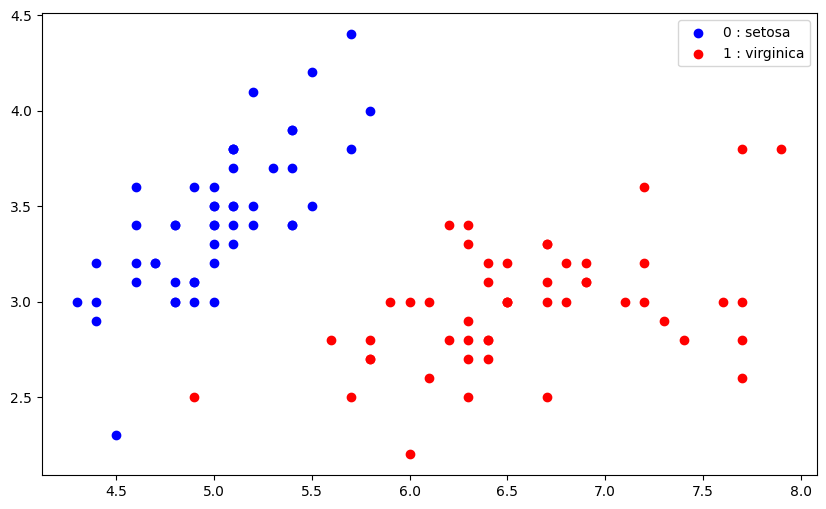

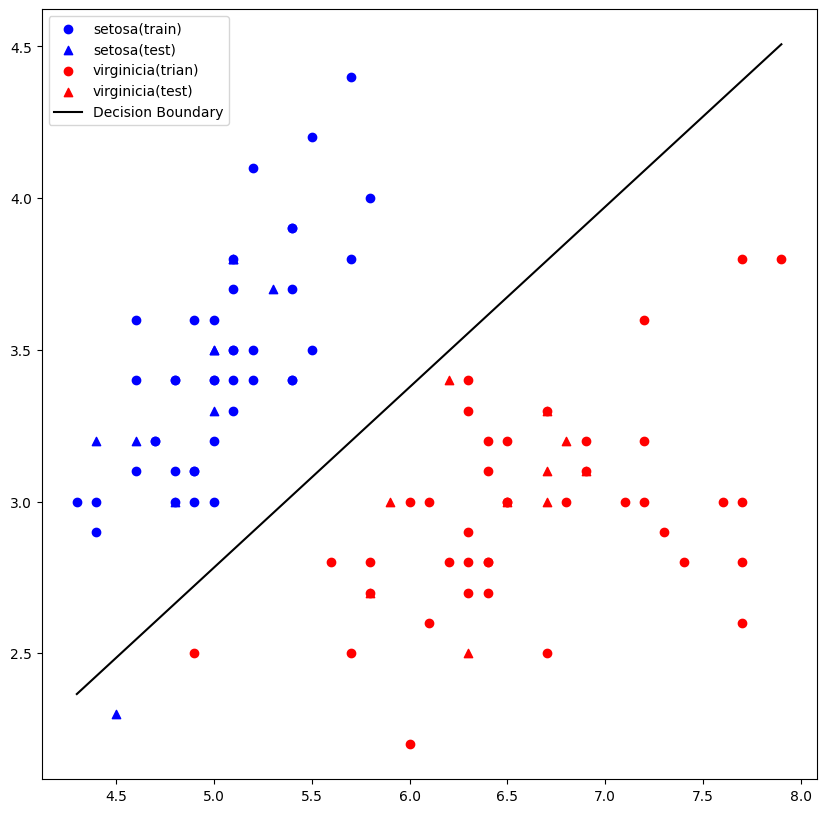

In [12]:
def solveLogisticRegression(iterations):

    #learn model to find a theta
    model = LogisticRegression(learning_rate=0.0001, num_iter=iterations)
    parameters = model.learn(X_train, y_train)
    print("\nparameters:",parameters)

    #equation of the decision boundary
    print("\nline equation: y=%+.2f"%parameters[0],"%+.2f"%parameters[1],"x1 %+.2f"%parameters[2],"x2")

    #calculate train error
    preds_ytrain = model.predict(X_train)
    print("\ntrain error:",errorfunc(preds_ytrain,y_train))

    #calculate test error
    preds_ytest = model.predict(X_test)
    print("\ntest error:",errorfunc(preds_ytest,y_test))

    #plot
    plotLogisticRegression(parameters)


#function for calculate error
def errorfunc(yhat,y):
    return((yhat!= y).mean())

def plotLogisticRegression(parameters):

    #plot all samples
    plt.figure(figsize=(10,6))
    plt.scatter(X[y == 0][:,0], X[y == 0][:,1], color = 'b', label = '0 : setosa')
    plt.scatter(X[y == 1][:,0], X[y == 1][:,1], color = 'r', label = '1 : virginica')
    plt.legend()


    x_values = [np.min(X[:, 0] ), np.max(X[:, 0]  )]

    y_values =  - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

    #plot Decision Boundary along with samples
    plt.figure(figsize=(10,10))
    plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], color='b',label='setosa(train)')
    plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], color='b',marker = '^' ,label='setosa(test)')
    plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], color='r', label='virginicia(trian)')
    plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], color='r',marker = '^' ,label='virginicia(test)')
    plt.savefig("/images/1.jpg")
    plt.legend()


    plt.plot(x_values, y_values, color = 'black' ,label='Decision Boundary')
    plt.savefig("/images/2.jpg")
    plt.legend()
    plt.show()




#call methods
numberOfIterations = 10000
solveLogisticRegression(numberOfIterations)